In [1]:
from numpy import *
from matplotlib.pyplot import *

In [2]:
m = 9.10938356e-31
hbar = 1.0545718e-34
omega = 2 * pi * 5e15

xmin = -2e-10
xmax = 2e-10
domain = linspace(xmin, xmax, 100)
v = linspace(0, 1) * 1e-17

In [3]:
def psi(x, i=0):
    if i == 0:
        return (m*omega/(pi*hbar))**(1/4) * exp(-m*omega*x**2/(2*hbar))
    if i == 1:
        return (m*omega/(pi*hbar))**(1/4) * (2*m*omega/hbar)**(1/2) * x * exp(-m*omega*x**2/(2*hbar))
    if i == 2:
        return (m*omega/(pi*hbar))**(1/4) * \
               1/(hbar*sqrt(2)) * \
               (2*m*omega*x**2-hbar) * \
               exp(-m*omega*x**2/(2*hbar))    
    
def potential(x):
    return m*omega**2*x**2/2

def En(n):
    return (n + 0.5) * hbar * omega

def scaled(x, i):
    return En(i) + 10**-6 * En(2) * psi(x, i)

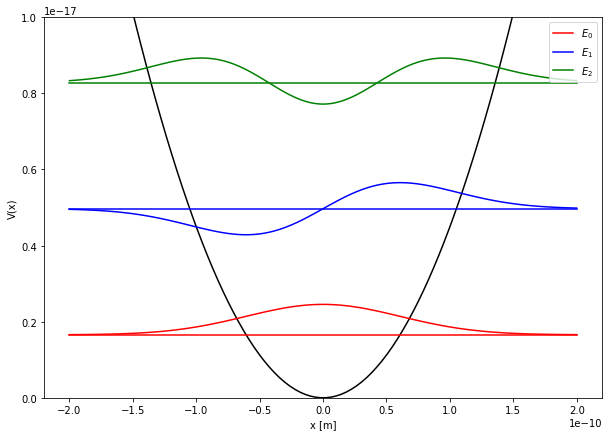

In [4]:
figure(figsize=(10,7))
plot(domain, potential(domain), 'k')
colours = ['r', 'b', 'g']
for i in range(3):
    plot([xmin, xmax], [En(i), En(i)], colours[i])
    plot(domain, scaled(domain, i), colours[i], label=f"$E_{i}$")

ylim([0, 1e-17])
legend(loc=1)    
ylabel("V(x)")
xlabel("x [m]")
show()

In [42]:
alpha = 0.22
eps = 1.5
w = 1e-9
L = alpha * w
V0 = eps * pi**2 * hbar**2 / (2*m*L**2)

def E(n):
    return (n*pi*hbar/w)**2 / (2*m) #- V0

def T(n):
    En = E(n)
    top = 4 * En * (En + V0)
    bottom = top + V0**2 * sin(2*L/hbar * sqrt(2*m*(En + V0)))**2
    return top/bottom

def R(n):
    En = E(n)
    top = V0**2 * sin(2*L/hbar * sqrt(2*m*(En+V0)))**2
    bottom = 4*En*(En+V0) + top
    return top/bottom

def c(n):
    return 2*sqrt(2) / (n*pi)

def psi(n, x):
    return c(n) * sin(n*pi*x/w)

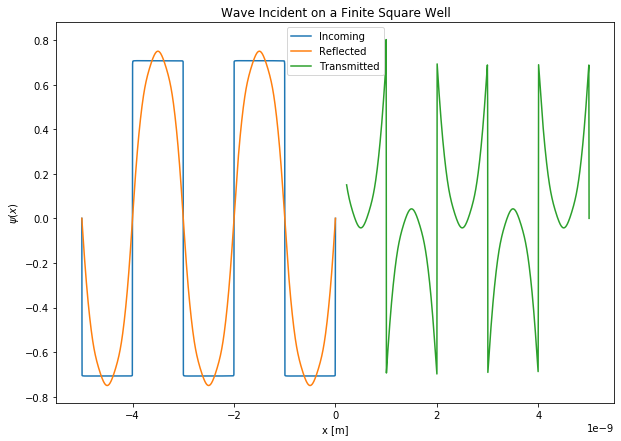

In [51]:
left = linspace(-5*w, 0, 1000)
right = linspace(L, 5*w, 1000)
incoming = 0
outgoing = 0
reflected = 0
for n in range(1, 10001, 2):
    incoming += psi(n, left)
    reflected += psi(n, left) * R(n)
    outgoing += psi(n, right) * T(n)

figure(figsize=(10,7))
plot(left, incoming, '-', label="Incoming")
plot(left, reflected, '-', label="Reflected")
plot(right, outgoing, '-', label="Transmitted")
title("Wave Incident on a Finite Square Well")
xlabel("x [m]")
ylabel("$\psi (x)$")
legend()
show()